# Supervised Learning - Classification - Naive Bayesian - Multinomial

## Name: Thantham Khamyai
## Student ID: 122097

## **TASK**

* Put **Multinomial Naive Classification** into a class that can **transform the data**, **fit** the model and do **prediction**.
* In the class, allow users to choose whether to use **CountVectorizer** or **TFIDFVectorizer** to transform the data.
* **Show** both classifications in the ways of **different Vectorization methods**
* **Learn about TFidfVectorizer** 

Firstly, just simply import neccessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Prepare Dataset
Dataset to be used in this lab work excercise is 20 new groups. This dataset is basically 18,000 text documents which were categorized into 20 groups. Moreover, we can define data extraction by train subset and test sibset via packages.

In [2]:
from sklearn.datasets import fetch_20newsgroups

We can filter dataset to select only some categories of new group classes by put list of target classes into the function. However, Lab tutorial already used  4 target classes. **In this lab work, I strongly attempt to use full form dataset that contains mentioned dataset information**

In [3]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

We further try to extract **X** and **y** from raw one, and do the same for train and test set

In [4]:
X_train = train.data
X_test = test.data
y_train = train.target
y_test = test.target

Also, this step, we are not able to put them into the model yet. However, we can show the **datatype** of the dataset by following

In [5]:
print(f'data type of X_train is {type(X_train)} With {len(X_train)} samples') 
print(f'data type of y_train is {type(y_train)} With {len(y_train)} samples') 

print(f'data type of X_train is {type(X_test)} With {len(X_test)} samples') 
print(f'data type of y_train is {type(y_test)} With {len(y_test)} samples') 

data type of X_train is <class 'list'> With 11314 samples
data type of y_train is <class 'numpy.ndarray'> With 11314 samples
data type of X_train is <class 'list'> With 7532 samples
data type of y_train is <class 'numpy.ndarray'> With 7532 samples


From above, we would see that X data are list of textual document by **11,314 and 7,532 as train and test** respectively, along with y data. To prove that, Example of texual document can be show as below

In [6]:
print(f'Example of X_train: \n {X_train[0]}')

Example of X_train: 
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







Also, **y data is numerical** interger label that indicates classes

In [7]:
print(f'Example of y_train: {y_train[0]} which is {train.target_names[y_train[0]]}')

Example of y_train: 7 which is rec.autos


To expand full categories of y, y textual classes as below

In [8]:
labels = train.target_names
print(f'all target names are \n {labels}')

all target names are 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


## 2. Naives Bayes Multinomial classification

Referring to previous excercise, we prepared texual documents contains a lot of vocabulary as raw. But, it is unreadable form for machine. we should convert them into machine-readable or numerical form before let them run. To do this, I will point the steps.

### 1) Convert textual document into Sparse Matrix 

This step is firstly to count each unique word in all document which occur in document i. this step we would count each word $w_i$ into each feature of X. The simple example of this is

\begin{equation}
\mathtt{X} = \begin{bmatrix}
       & w_i & ... & w_n\\
   1   & 1 & 0 & 2\\
   ... & 2 & 0 & 3\\
   m   & 0 & 1 & 0\\
\end{bmatrix}
\end{equation} 

Thus, we can easily call Count Vectorizer imported sklearn.feature_extraction.text and fit & transform. Then we can get Sparse Matrix that caontains count of each word as feature of X. This is machine readable to further calcualate into model.

### 2) Calculate $P(y=k)$

From the equation:

$$
P(y|w) = \frac{P(w|y)P(y)}{P(w)}
$$

we aim to find Possibility of y occur whether w is given. This step we would calcualate $P(y)$ first for each class by equation:

$$P(y = k) = \frac{\Sigma_{i=1}^{m}1(y=k)}{m} $$

### 3) Calculate Likelihood $P(w|y)$

This step is to calculate possibility of $w$ when &y& is a given target class. To calculate it, we will use likelihood which will count unique word occuring at $y$ class in document $i$ and divided by all number of $w_i$ in all document from given $y$ class. However, some words moght nerver be counted (very low frequency). This cuases likelihood output is 0. So, we use **Laplace Smoothing** to make likelihood is more suitable to be calculated by put +1 for every $w_i$ count with +n for smoothening likelihood

 $$ P(w_i \in train \mid y=k) = \frac{count(w_i \in train, k) + 1}{\sum_{i=1}^{n} count(w_i \in train, k) + n} $$


### 4) Predict y hat

Prediction step is to implement trained **priors** and **likelihood** to calculate the possibility of $\hat(y)$ given when X_test calculated. we can use this equation:

$$P(y=k)\prod_{i=1}^{n} p(w_i \in test \mid y=k)^{\text{freq of }w_i \in test}$$

However, the product of given equation provides very low of possibility form. Consequently, we simply implement **Monotically Increasing Function** to enhance possibility of product by

$$\log \ P(y=k) + (\text{freq of }w_i \in test) * \sum_{i=1}^{n} \log \ p(w_i \in test \mid y=k)$$

Then we will get array of enhanced possibility of $P(y|w)$. and we can implment np.argmax to get index of maximum value which from possiblity given each classes




Then Construct the model

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

class NaivesBayes_multinomial:
    
    def __init__(self, vectorize_method='counter', alpha=1):
        
        self.vectorize_method = vectorize_method # Selective Vectorize Method between : 'count','tfidf'
        self.laplace = alpha # stand for Laplace parameter
        
    def fit(self, X, y):
        
        # 1) Select Vectorize Method
        
        if self.vectorize_method == 'count': # if define 'count'
            self.vectorizer = CountVectorizer() # just create instance CountVectorizer
        elif self.vectorize_method == 'tfidf': # if define 'tfidf'
            self.vectorizer = TfidfVectorizer() # just create instance TfidfVectorizer
        else: # otherwise raise value error
            raise ValueError("Unavailable vectorize method. {'count', 'tfidf'}")
        
        # 1-2) Vectorize it
        X = self.vectorizer.fit_transform(X)
        
        # Init reuse values
        self.m = X.shape[0]
        self.n = X.shape[1]
        class_list = np.unique(y)
        k = len(class_list)
        
        # init priors and likelihood by the number of target classes
        self.priors = np.zeros(k)
        self.likelihoods = np.zeros((k, self.n))
        
        # 2) and 3) Looping each target class to calculate prior and likelihood
        for class_idx, class_label in enumerate(class_list):
            
            X_at_class = X[y == class_label] # get X_train at that class
            self.priors[class_idx] = self.prior(X_at_class) # calcualte prior and record in priors list
            self.likelihoods[class_idx, :] = self.likelihood(X_at_class) # calculate likelihood and record in likelihoods list
        
        
    def likelihood(self,X_at_class):
        
        return ((X_at_class.sum(axis=0)) + self.laplace) / (np.sum(X_at_class.sum(axis=0)) + self.n) # (count(w_i)+ laplace) / (all(w_i) + n)
        
    def prior(self, X_class):
        
        p_y = X_class.shape[0] / self.m # Just count y_k / m
        
        return p_y
        
    def predict(self, X_test):
        
        X_test = self.vectorizer.transform(X_test) # Transform X_test using pre-difined vectorizer
        
        py_xtest = np.log(self.priors) + X_test @ np.log(self.likelihoods.T) # implement monitically increasing function log to get enhanced product
        
        return np.argmax(py_xtest, axis=1) # simply return idx of maximum value of probrabilistic as integer target classes
    

**REMARK: I HAVE USED TFIDFVECTORIZER AS OPTION BECAUSE I WILL EXPLAIN ON TFIDF METHOD IN NEXT SECTION** 

## 3-1 Implement Model and Predict using 'CountVectorizer'

Next step is just to use the contructed model with prepared data. However, The data put into model should be raw textual because we already implement model option to select vectorization method

In [10]:
import time

model_count = NaivesBayes_multinomial(vectorize_method='count') # Create model instance with parameter 'count' 

start_time = time.time() # start timing

model_count.fit(X_train, y_train) # fitting

print(f'fitting time: {np.round(time.time()-start_time, 2)} seconds') # show fitting time

fitting time: 2.24 seconds


After fitting, we can simply predict the y hat use model function. The **output** comes from the function is already **interger** form of target classes

In [11]:
start_time = time.time() # start timing

yhat_count = model_count.predict(X_test) # predict

print(f'predicting time: {np.round(time.time()-start_time, 2)} seconds') # show predict time
print(f'predicted y example: {yhat_count[:20]}') # show first 20 predicted

predicting time: 1.3 seconds
predicted y example: [ 7 11  0 17  0 13 15 15  5  1  1  5 17  8 15  3  4  1 12 16]


For that predicted classes, we can investigate texual label of each prediected class as following

In [12]:
print(f'predicted y label classes example: {[labels[i] for i in yhat_count[:20]]}')

predicted y label classes example: ['rec.autos', 'sci.crypt', 'alt.atheism', 'talk.politics.mideast', 'alt.atheism', 'sci.med', 'soc.religion.christian', 'soc.religion.christian', 'comp.windows.x', 'comp.graphics', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'rec.motorcycles', 'soc.religion.christian', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.electronics', 'talk.politics.guns']


## 4-1 Model Evaluation using 'CountVectorizer'

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score, classification_report

n_classes = len(np.unique(y_test))

print('>>>>>>>>>>>>> CountVectorization <<<<<<<<<<<<<<<')

print(f"\n######### Accuracy: {np.sum(yhat_count == y_test)/len(y_test)}")

print("\n\n###############Average precision score###############\n")
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
yhat__countbinarized = label_binarize(yhat_count, classes=np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat__countbinarized[:, i])
    print(f"Class {i} -> {labels[i]} score: ", class_score)
    
print("\n\n\n#################Classification Report################\n")
print("Report: \n", classification_report(y_test, yhat_count, target_names=labels))

>>>>>>>>>>>>> CountVectorization <<<<<<<<<<<<<<<

######### Accuracy: 0.7728359001593202


###############Average precision score###############

Class 0 -> alt.atheism score:  0.6168123096804696
Class 1 -> comp.graphics score:  0.5059736181999389
Class 2 -> comp.os.ms-windows.misc score:  0.052684990740016875
Class 3 -> comp.sys.ibm.pc.hardware score:  0.4389651771489265
Class 4 -> comp.sys.mac.hardware score:  0.6415504370636098
Class 5 -> comp.windows.x score:  0.5555174520045655
Class 6 -> misc.forsale score:  0.6238187316919536
Class 7 -> rec.autos score:  0.793388588390156
Class 8 -> rec.motorcycles score:  0.887590227018324
Class 9 -> rec.sport.baseball score:  0.8443650028354411
Class 10 -> rec.sport.hockey score:  0.8970183217707456
Class 11 -> sci.crypt score:  0.6377643688825713
Class 12 -> sci.electronics score:  0.5443819973224954
Class 13 -> sci.med score:  0.726442033125988
Class 14 -> sci.space score:  0.7466873954213826
Class 15 -> soc.religion.christian score:  0.6724

To see how much each class was predicted properly. **Confusion Matrix** is proper way to visualize 

Text(0.5, 1.0, 'Confusion Matrix from CountVectorization model')

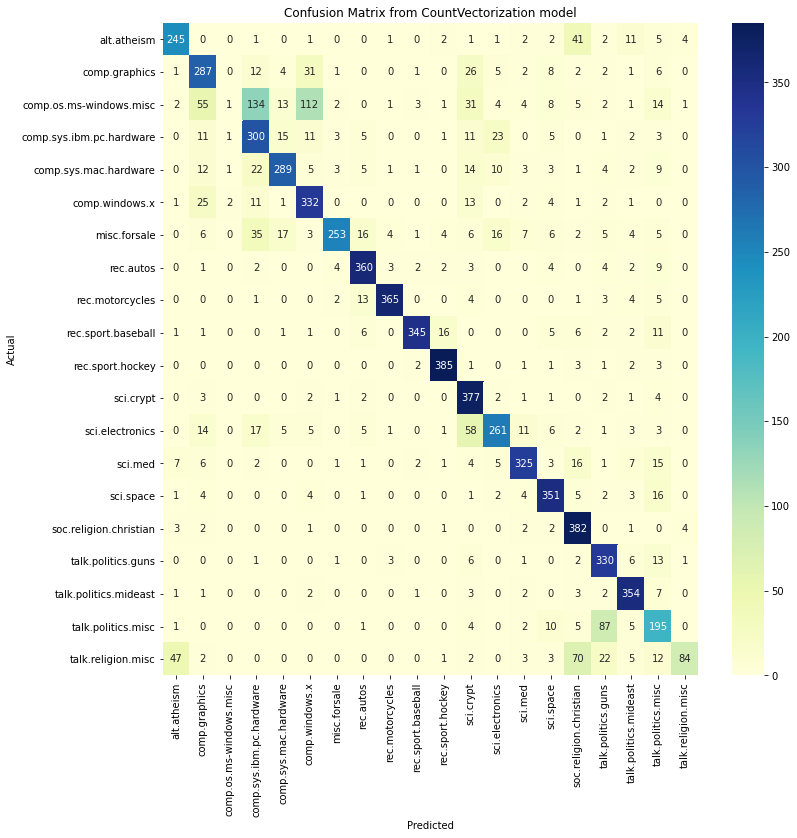

In [14]:
from sklearn.metrics import confusion_matrix

c = confusion_matrix(y_test, yhat_count)

import seaborn as sns

plt.rcParams["figure.figsize"] = (12,12)
sns.heatmap(c, annot=True, fmt="d", cmap="YlGnBu",
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix from CountVectorization model')

## 3-2 Implement Model and Predict using 'TfidfVectorizer'

Furthermore, I try to convince that **TfidfVectorizer** is able to be used for fitting model also along with **CountVectorizer** availability. And, let me show

### Create model instance and fitting

In [15]:
import time

model_tfidf = NaivesBayes_multinomial(vectorize_method='tfidf') # Create model instance with parameter 'tfidf' 

start_time = time.time() # start timing

model_tfidf.fit(X_train, y_train) # fitting

print(f'fitting time: {np.round(time.time()-start_time, 2)} seconds') # show fitting time

fitting time: 2.24 seconds


### Predicting

In [16]:
start_time = time.time() # start timing

yhat_tfidf = model_tfidf.predict(X_test) # predict

print(f'predicting time: {np.round(time.time()-start_time, 2)} seconds') # show predict time
print(f'predicted y example: {yhat_tfidf[:20]}') # show first 20 predicted

predicting time: 1.42 seconds
predicted y example: [ 7 11  0 17  0 13 15 15  5  1  2  5 17  8 15  3  2  1 12 16]


## 4-2 Model Evaluation using 'TfidfVectorizer'

### Model evaluation

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score, classification_report

n_classes = len(np.unique(y_test))

print('>>>>>>>>>>>>>>>>>>> TfidfVectorization <<<<<<<<<<<<<<<<<<<<<<<<')

print(f"\n######### Accuracy: {np.sum(yhat_tfidf == y_test)/len(y_test)}")

print("\n\n###############Average precision score###############\n")
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
yhat_tfidf_binarized = label_binarize(yhat_tfidf, classes=np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_tfidf_binarized[:, i])
    print(f"Class {i} -> {labels[i]} score: ", class_score)
    
print("\n\n\n#################Classification Report################\n")
print("Report: \n", classification_report(y_test, yhat_tfidf, target_names=labels))

>>>>>>>>>>>>>>>>>>> TfidfVectorization <<<<<<<<<<<<<<<<<<<<<<<<

######### Accuracy: 0.7738980350504514


###############Average precision score###############

Class 0 -> alt.atheism score:  0.43761982805890226
Class 1 -> comp.graphics score:  0.5431066076841845
Class 2 -> comp.os.ms-windows.misc score:  0.5543869675509703
Class 3 -> comp.sys.ibm.pc.hardware score:  0.5342570461687778
Class 4 -> comp.sys.mac.hardware score:  0.6743660625150177
Class 5 -> comp.windows.x score:  0.6839836188820012
Class 6 -> misc.forsale score:  0.6629135397023337
Class 7 -> rec.autos score:  0.7823551874386144
Class 8 -> rec.motorcycles score:  0.8768969736703386
Class 9 -> rec.sport.baseball score:  0.8348461439653506
Class 10 -> rec.sport.hockey score:  0.8664800738934689
Class 11 -> sci.crypt score:  0.5760310353636195
Class 12 -> sci.electronics score:  0.5210541338462026
Class 13 -> sci.med score:  0.693028988010987
Class 14 -> sci.space score:  0.755572028759291
Class 15 -> soc.religion.christian

### 

Text(0.5, 1.0, 'Confusion Matrix from TfidVectorization model')

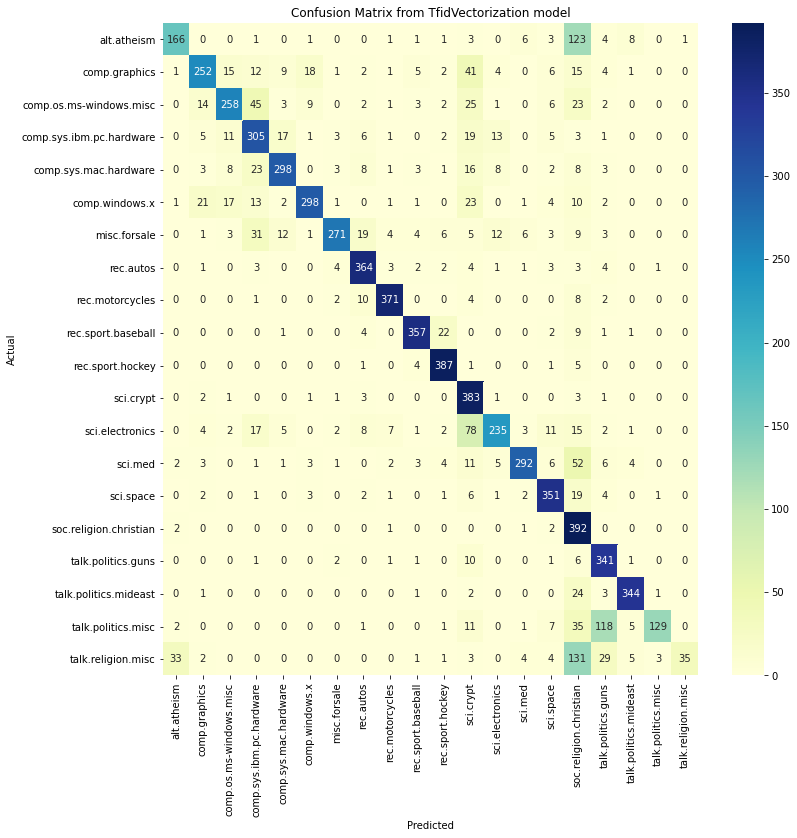

In [18]:
from sklearn.metrics import confusion_matrix

c = confusion_matrix(y_test, yhat_tfidf)

import seaborn as sns

plt.rcParams["figure.figsize"] = (12,12)
sns.heatmap(c, annot=True, fmt="d", cmap="YlGnBu",
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix from TfidfVectorization model')

# Tfid Vectorization

From previous lesson, we have learned about counter vectorizer which performs counting $w_i$ as the number of vocab occuring in a document. the output of it is sparse matrix which contains counted vocab as features (n) in each document (m). the shape represented as (m, n). This section will demonstrateon on how Tfidf works and construct it into function to be useful in the future.

### Extract Example of X

First, we just extract 10 samples as example. These are just raw documents.

In [19]:
X = train.data[:10]

### Create instance of Count Vectorizer

Then, we create **CountVectorizer** instance from sklearn package.

In [20]:
countervect = CountVectorizer()

### Basically implement Count Vectorizer

Next, we can convert raw document into count vectorized form which contain count number of each unique word in all documents

In [21]:
X_countvect = countervect.fit_transform(X)

X_countvect = X_countvect.toarray()

print(f'X from CountVectorization: \n {X_countvect}')
print(f'shape of X now is: {X_countvect.shape}')
print(f'This means that there are {X_countvect.shape[0]} documents with all {X_countvect.shape[1]} unique words')

X from CountVectorization: 
 [[0 0 0 ... 0 2 1]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 4 ... 0 3 1]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
shape of X now is: (10, 881)
This means that there are 10 documents with all 881 unique words


From above, we examined that X now contains 10 documents with 881 words count

Sequently, Tfidf can possibly perform transformation directly on sparse matrix obtained from above step.

The full formula of TF-IDF is

$$ \text{TF-IDF} =  \text{TF} * \text{IDF} $$

The steps to complete calculation as following,

1) Calculate 
$$ \text{TF}_t = \frac{\text{Count of words t in that document}}{\text{Total count of words in that document}}$$

2) Calculate

$$ \text{IDF} = \log\left(\frac{\text{Number of documents}}{\text{Number of documents containing that word}}\right) + 1$$

3) Calculate
$$ norm(t_i) = \frac{t_i}{\sqrt{t_1^2 + t_2^2 + ....+t_n^2}} $$ 

I have summarized all steps into the function as:

In [22]:
def TfidfVectorize(X_counted):
    
    # 1) calc TF
    sum_word = np.sum(X_counted, axis=1).reshape(-1, 1) # cal sum of all word in each doc
    tf = X_counted / sum_word # divide -> count(w_i) / all_word in doc_i
    
    # 2) calc IDF
    idf = np.log(X_counted.shape[0] / np.count_nonzero(X_counted, axis=0))+1 # cal idf = log[ (# doc)/(# of doc contain w_i) ]+1
    
    tf_idf = tf * idf # simply multiply
    
    # 3) calc norm(t_i)
    norm_factor = np.sqrt(np.sum(np.square(tf_idf), axis=1)).reshape(-1,1) # cal norm factor
    norm_tfidf = np.array([tf_idf[i, :] / norm_factor[i] for i in range(tf_idf.shape[0])]) # divide tf_idf with norm_factor

    return norm_tfidf

Now, let it do the job by putting X_countvect which is sparse matrix (converted to np.array) to function

In [23]:
X_tfidfvectorized = TfidfVectorize(X_countvect) # just use new function for TF-IDF vectirization from scratch

We can examine the output from the function as:

In [24]:
print(f'output from TfidfVectorize function (new created) is: \n {X_tfidfvectorized}') # print it as array

output from TfidfVectorize function (new created) is: 
 [[0.         0.         0.         ... 0.         0.07133334 0.0642675 ]
 [0.         0.         0.         ... 0.         0.02867802 0.05167471]
 [0.         0.         0.         ... 0.         0.01976823 0.        ]
 ...
 [0.         0.         0.10121014 ... 0.         0.0281131  0.01688559]
 [0.         0.17275465 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.01972337 0.        ]]


I will prove output from the created function using **TfidfTransformer** imported from sklearn:

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer # import Transformer

transformer = TfidfTransformer() # create instance
X_countvert_tfidtransform = transformer.fit_transform(X_countvect) # fit and transform X_countvect

print(f'output from TfidfTranformation is: \n {X_countvert_tfidtransform.toarray()}') # print it as array

output from TfidfTranformation is: 
 [[0.         0.         0.         ... 0.         0.08122347 0.06804081]
 [0.         0.         0.         ... 0.         0.03372889 0.0565093 ]
 [0.         0.         0.         ... 0.         0.02207828 0.        ]
 ...
 [0.         0.         0.09856823 ... 0.         0.03281673 0.01832703]
 [0.         0.16574254 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.02258813 0.        ]]


However, Prof.Chaklam has mentioned about not exactly the same result due to the digit precision produced from our calculation and configurated in sklearn package. 
 
Eventhough, it was like that, the function did the job properly. I have used **TfidfVectorizer** into the **Navies Bayes** class because it might take less time rather than new constructed function.